In [1]:
import re
import pandas as pd
import numpy as np

In [2]:
f = open("ADS.txt", 'r',encoding='utf-8')

In [3]:
data = f.read()
print(data)

2/20/22, 14:06 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
2/12/22, 19:34 - Akash Karmakar (ADS) created group "Interview session (DS)"
2/20/22, 14:06 - You joined using this group's invite link
2/20/22, 15:20 - +91 80512 47427: I have enrolled for project interview not for interview preparation....
2/20/22, 15:20 - +91 80512 47427: Please someone share the meeting link of interview preparation......
2/20/22, 15:21 - +91 95787 68405: I think today is not a session
2/20/22, 15:21 - +91 80512 47427: Yes it is.....
2/20/22, 15:21 - +91 80512 47427: From 6 pm....
2/20/22, 15:21 - +91 95787 68405: For me it's showing no sessions
2/20/22, 15:22 - +91 80512 47427: Someone shared see it....
2/20/22, 15:22 - +91 95787 68405: Okay can you share the link ?
2/20/22, 15:22 - +91 80512 47427: I haven't enrolled and now it's not showing.....
2/20/22, 15:23 - +91 80512 47427: That's why I request anyone t

In [4]:
pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}\s-\s'

In [5]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Akash Karmakar (ADS) created group "Interview session (DS)"\n',
 "You joined using this group's invite link\n",
 '+91 80512 47427: I have enrolled for project interview not for interview preparation....\n',
 '+91 80512 47427: Please someone share the meeting link of interview preparation......\n',
 '+91 95787 68405: I think today is not a session\n',
 '+91 80512 47427: Yes it is.....\n',
 '+91 80512 47427: From 6 pm....\n',
 "+91 95787 68405: For me it's showing no sessions\n",
 '+91 80512 47427: Someone shared see it....\n',
 '+91 95787 68405: Okay can you share the link ?\n',
 "+91 80512 47427: I haven't enrolled and now it's not showing.....\n",
 "+91 80512 47427: That's why I request anyone to share the link of meeting for interview preparation before 6 pm...\n",
 "+91 95787 68405: Ok but I have enrolled for me it's showing like no sess

In [6]:
# EXTRACT dATES
dates = re.findall(pattern, data)
dates

['2/20/22, 14:06 - ',
 '2/12/22, 19:34 - ',
 '2/20/22, 14:06 - ',
 '2/20/22, 15:20 - ',
 '2/20/22, 15:20 - ',
 '2/20/22, 15:21 - ',
 '2/20/22, 15:21 - ',
 '2/20/22, 15:21 - ',
 '2/20/22, 15:21 - ',
 '2/20/22, 15:22 - ',
 '2/20/22, 15:22 - ',
 '2/20/22, 15:22 - ',
 '2/20/22, 15:23 - ',
 '2/20/22, 15:23 - ',
 '2/20/22, 15:24 - ',
 '2/20/22, 15:24 - ',
 '2/20/22, 15:24 - ',
 '2/20/22, 15:24 - ',
 '2/20/22, 15:24 - ',
 '2/20/22, 15:24 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:25 - ',
 '2/20/22, 15:26 - ',
 '2/20/22, 15:26 - ',
 '2/20/22, 15:26 - ',
 '2/20/22, 15:26 - ',
 '2/20/22, 15:27 - ',
 '2/20/22, 15:27 - ',
 '2/20/22, 15:27 - ',
 '2/20/22, 15:27 - ',
 '2/20/22, 16:02 - ',
 '2/20/22, 16:11 - ',
 '2/20/22, 16:12 - ',
 '2/20/22, 16:18 - ',
 '2/20/22, 16:18 - ',
 '2/20/22, 16:18 - ',
 '2/20/22, 16:19 - ',
 '2/20/22, 16:25 - ',
 '2/20/22,

In [7]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')

df.rename(columns = {'message_date':'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-02-20 14:06:00
1,"Akash Karmakar (ADS) created group ""Interview ...",2022-02-12 19:34:00
2,You joined using this group's invite link\n,2022-02-20 14:06:00
3,+91 80512 47427: I have enrolled for project i...,2022-02-20 15:20:00
4,+91 80512 47427: Please someone share the meet...,2022-02-20 15:20:00


In [8]:
df.shape

(2731, 2)

In [9]:
#seperate users and msgs

users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: # user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

In [10]:
df.head(2)

,date,user,message
0,2022-02-20 14:06:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-02-12 19:34:00,group_notification,"Akash Karmakar (ADS) created group ""Interview ..."


In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [12]:
df['month'] = df['date'].dt.month_name()

In [13]:
df['day'] = df['date'].dt.day

In [14]:
df['hour'] = df['date'].dt.hour

In [15]:
df['minute'] = df['date'].dt.minute

In [16]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-02-20 14:06:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,February,20,14,6
1,2022-02-12 19:34:00,group_notification,"Akash Karmakar (ADS) created group ""Interview ...",2022,February,12,19,34
2,2022-02-20 14:06:00,group_notification,You joined using this group's invite link\n,2022,February,20,14,6
3,2022-02-20 15:20:00,+91 80512 47427,I have enrolled for project interview not for ...,2022,February,20,15,20
4,2022-02-20 15:20:00,+91 80512 47427,Please someone share the meeting link of inter...,2022,February,20,15,20


In [17]:

from urlextract import URLExtract

In [18]:


extractor = URLExtract()

links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [19]:
len(links)

85

In [20]:
round(df['user'].value_counts()/df.shape[0]*100).reset_index().rename(columns = {'index': 'name', 'user': 'percent'})

,name,percent
0,+91 90359 28210,22.0
1,+91 81436 19852,8.0
2,Shararat Chandrak(ADS),6.0
3,V,4.0
4,group_notification,4.0
...,...,...
101,+91 70572 41658,0.0
102,+91 90479 32620,0.0
103,+91 76208 77979,0.0
104,+91 82860 07034,0.0


In [21]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != "<Media omitted>\n"]

In [22]:
temp[temp['message'] != "<Media omitted>\n"]

,date,user,message,year,month,day,hour,minute
3,2022-02-20 15:20:00,+91 80512 47427,I have enrolled for project interview not for ...,2022,February,20,15,20
4,2022-02-20 15:20:00,+91 80512 47427,Please someone share the meeting link of inter...,2022,February,20,15,20
5,2022-02-20 15:21:00,+91 95787 68405,I think today is not a session\n,2022,February,20,15,21
6,2022-02-20 15:21:00,+91 80512 47427,Yes it is.....\n,2022,February,20,15,21
7,2022-02-20 15:21:00,+91 80512 47427,From 6 pm....\n,2022,February,20,15,21
...,...,...,...,...,...,...,...,...
2726,2023-01-30 12:28:00,+91 79773 40137,Wait till evening i will send you that code\n,2023,January,30,12,28
2727,2023-02-09 09:59:00,+91 70572 41658,,2023,February,9,9,59
2728,2023-02-09 11:28:00,V,This is fake\n,2023,February,9,11,28
2729,2023-02-09 11:28:00,V,Don't pay money to them\n,2023,February,9,11,28


In [23]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stopwords.words('english'):
            words.append(word)
    

In [25]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,u,134
1,data,125
2,yes,104
3,anyone,96
4,one,86
5,interview,79
6,?,65
7,ok,65
8,got,55
9,please,53


In [111]:
emojis = []

for message in df['message']:
    for words in message:
        if words in emoji.EMOJI_DATA:
            emojis.extend(words)


        

In [115]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,👍,53
1,🏻,39
2,😅,20
3,😂,14
4,😊,9
5,👌,9
6,👏,9
7,🤝,8
8,🙌,6
9,😃,6


In [117]:
emojis2 = []

for message in df['message']:
            emojis2.extend([c for c in message if c in emoji.EMOJI_DATA])


In [118]:
pd.DataFrame(Counter(emojis2).most_common(len(Counter(emojis2))))

,0,1
0,👍,53
1,🏻,39
2,😅,20
3,😂,14
4,😊,9
5,👌,9
6,👏,9
7,🤝,8
8,🙌,6
9,😃,6


In [121]:
df['month_num'] = df['date'].dt.month

In [125]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

In [128]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [130]:
timeline['time'] = time

In [131]:
timeline

,year,month_num,month,message,time
0,2022,2,February,309,February-2022
1,2022,3,March,404,March-2022
2,2022,4,April,238,April-2022
3,2022,5,May,290,May-2022
4,2022,6,June,197,June-2022
5,2022,7,July,54,July-2022
6,2022,8,August,323,August-2022
7,2022,9,September,431,September-2022
8,2022,10,October,268,October-2022
9,2022,11,November,50,November-2022


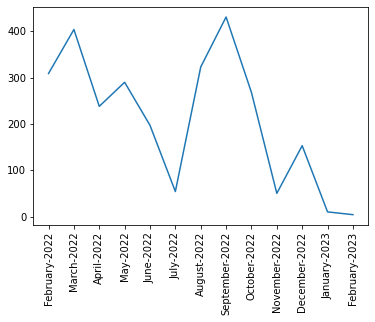

In [137]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [139]:
df['only_date'] = df['date'].dt.date

In [143]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.xticks(rotation="vertical")
plt.show()

In [147]:
df['day_name']=df['date'].dt.day_name()

In [148]:
df['day_name'].value_counts()

Tuesday      462
Thursday     449
Wednesday    432
Monday       369
Friday       365
Sunday       330
Saturday     324
Name: day_name, dtype: int64

In [151]:
df

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name
0,2022-02-20 14:06:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,February,20,14,6,2,2022-02-20,Sunday
1,2022-02-12 19:34:00,group_notification,"Akash Karmakar (ADS) created group ""Interview ...",2022,February,12,19,34,2,2022-02-12,Saturday
2,2022-02-20 14:06:00,group_notification,You joined using this group's invite link\n,2022,February,20,14,6,2,2022-02-20,Sunday
3,2022-02-20 15:20:00,+91 80512 47427,I have enrolled for project interview not for ...,2022,February,20,15,20,2,2022-02-20,Sunday
4,2022-02-20 15:20:00,+91 80512 47427,Please someone share the meeting link of inter...,2022,February,20,15,20,2,2022-02-20,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
2726,2023-01-30 12:28:00,+91 79773 40137,Wait till evening i will send you that code\n,2023,January,30,12,28,1,2023-01-30,Monday
2727,2023-02-09 09:59:00,+91 70572 41658,,2023,February,9,9,59,2,2023-02-09,Thursday
2728,2023-02-09 11:28:00,V,This is fake\n,2023,February,9,11,28,2,2023-02-09,Thursday
2729,2023-02-09 11:28:00,V,Don't pay money to them\n,2023,February,9,11,28,2,2023-02-09,Thursday


In [156]:
period = []

for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + '-' + str('00'))
    elif hour == 0:
        period.append(str('00') + '-' + str(hour+1))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [157]:
df['period'] = period

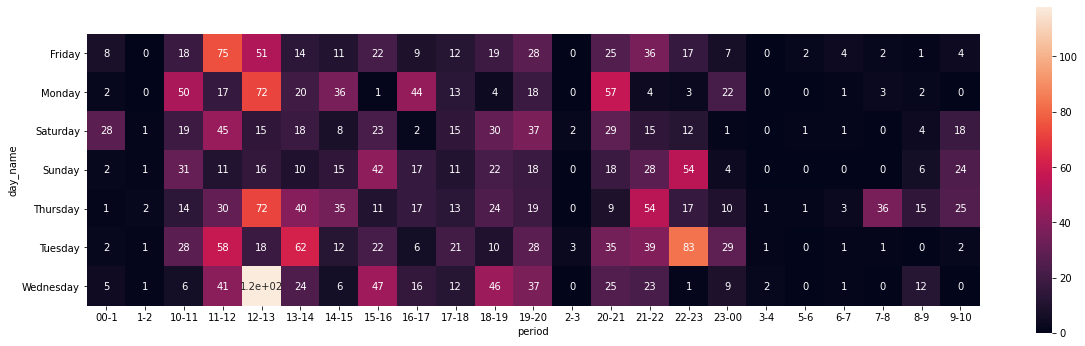

In [167]:
import seaborn as sns

plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns = 'period', values='message',aggfunc='count').fillna(0), annot=True,square=True)
plt.yticks(rotation='horizontal')
plt.show()